## Unsupervised Clustering

We use k-means clustering to categorise the loan data.

In [1]:
#-----------------------------------packages-----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)

In [2]:
#----------------------------------load data-----------------------------------
data = pd.read_csv('data/data.csv')
X = data

We then encode the categorical columns, fitting the encoder and transforming the data.

In [3]:
#------------------------scaling and encoding columns--------------------------
scaling_cols = X.select_dtypes(include = [np.number]).columns

scaler = StandardScaler()
scaler.fit(X[scaling_cols])

def scale_data(X):
       return X.drop(scaling_cols, axis = 1).reset_index(drop = True).join(
              pd.DataFrame(scaler.transform(X[scaling_cols]),
                                            columns = scaling_cols))
X = scale_data(X)

encoding_cols = X.select_dtypes(exclude = [np.number, bool]).columns

encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(X[encoding_cols])

def encode_data(X):
       return X.drop(encoding_cols, axis = 1).reset_index(drop = True).join(
              pd.DataFrame(encoder.transform(X[encoding_cols]).toarray()))

X = encode_data(X)
X.columns = X.columns.map(str)

We use the elbow method and silhouette analaysis to choose the optimal number of clusters for the k-means model.

  0%|          | 0/18 [00:00<?, ?it/s]

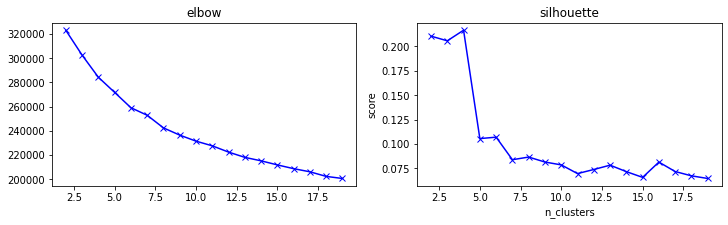

In [4]:
#-------------------------elbow and silhouette tuning--------------------------
sum_sq_dist = []
silhouette_avg = []

cluster_range = range(2,20)
for n_clusters in tqdm(cluster_range):
    model = KMeans(n_clusters = n_clusters)
    model.fit(X)

    sum_sq_dist.append(model.inertia_)
    silhouette_avg.append(silhouette_score(X, model.labels_))

fig, axs = plt.subplots(1, 2, figsize = (12, 3), sharey = False)
axs[0].plot(cluster_range, sum_sq_dist, 'bx-')
axs[0].title.set_text('elbow')

axs[1].plot(cluster_range, silhouette_avg, 'bx-')
axs[1].title.set_text('silhouette')

for n in range(1,2):
    axs[n].set_xlabel('n_clusters')
    axs[n].set_ylabel('score')

plt.show()

Finally, we run on our optimised model on the dataset to generate the clusters.

In [5]:
n_clusters = 7
model = KMeans(n_clusters = n_clusters)

model.fit(X)

data.insert(0,'cluster', model.labels_)
data.head()

,cluster,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,open_rv_12m,open_rv_24m,total_rev_hi_lim,inq_last_12m,default_ind,mths_since_last_delinq_flag,mths_since_last_record_flag,mths_since_last_major_derog_flag,last_pymnt_days,days_to_nxt_pymnt,last_credit_pull_days,days_after_first_credit,issue_days
0,2,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Other,10.0,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,1.0,-1.0,-1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.0,0.00,171.62,0.0,-1.0,0.0,0.0,81008.5,1.0,2.0,0.0,1.0,12.0,1.0,2.0,23800.0,2.0,0,False,False,False,1127,396,1492,9830,4352
1,6,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Other,1.0,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,5.0,-1.0,-1.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,119.3,1.11,119.66,0.0,-1.0,0.0,0.0,81008.5,1.0,2.0,0.0,1.0,12.0,1.0,2.0,23800.0,2.0,1,False,False,False,487,1036,640,4627,4352
2,2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,Other,10.0,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,2.0,-1.0,-1.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.0,0.00,649.91,0.0,-1.0,0.0,0.0,81008.5,1.0,2.0,0.0,1.0,12.0,1.0,2.0,23800.0,2.0,0,False,False,False,913,610,1492,3682,4352
3,1,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,Other,10.0,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,1.0,35.0,-1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.0,0.00,357.48,0.0,-1.0,0.0,0.0,81008.5,1.0,2.0,0.0,1.0,12.0,1.0,2.0,23800.0,2.0,0,True,False,False,1127,396,1127,5782,4352
4,2,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,Other,1.0,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,0.0,38.0,-1.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.0,0.00,67.79,0.0,-1.0,0.0,0.0,81008.5,1.0,2.0,0.0,1.0,12.0,1.0,2.0,23800.0,2.0,0,True,False,False,1492,31,1492,5813,4352
